In [1]:
import pandas as pd
import warnings
from performance_utils import calc_metrics, get_roc_auc
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

wv = pd.read_csv('data/word2vec_100.csv')
sg = pd.read_csv('data/skipgram_100.csv')
ft = pd.read_csv('data/fasttext_100.csv')

In [2]:
scores_data = []

# Using RNN

### CBOW

2024-03-18 22:06:50.650201: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-03-18 22:06:50.650234: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-03-18 22:06:50.650246: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-03-18 22:06:50.650501: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-18 22:06:50.650874: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/9


2024-03-18 22:06:51.853994: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-03-18 22:06:51.905882: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


1464/1464 [==============================] - 40s 27ms/step - loss: 0.3184 - accuracy: 0.8728 - val_loss: 0.3011 - val_accuracy: 0.8781
Epoch 2/9
1464/1464 [==============================] - 38s 26ms/step - loss: 0.2918 - accuracy: 0.8837 - val_loss: 0.2832 - val_accuracy: 0.8903
Epoch 3/9
1464/1464 [==============================] - 38s 26ms/step - loss: 0.2834 - accuracy: 0.8878 - val_loss: 0.2795 - val_accuracy: 0.8896
Epoch 4/9
1464/1464 [==============================] - 38s 26ms/step - loss: 0.2773 - accuracy: 0.8905 - val_loss: 0.2731 - val_accuracy: 0.8917
Epoch 5/9
1464/1464 [==============================] - 37s 25ms/step - loss: 0.2692 - accuracy: 0.8941 - val_loss: 0.2585 - val_accuracy: 0.8991
Epoch 6/9
1464/1464 [==============================] - 37s 25ms/step - loss: 0.2525 - accuracy: 0.9020 - val_loss: 0.2590 - val_accuracy: 0.8995
Epoch 7/9
1464/1464 [==============================] - 37s 25ms/step - loss: 0.2371 - accuracy: 0.9082 - val_loss: 0.2286 - val_accuracy: 0.

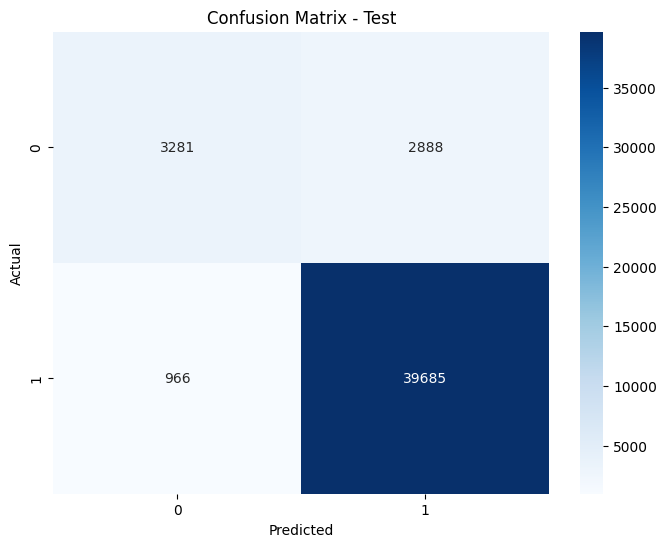

1464/1464 [==============================] - 15s 10ms/step


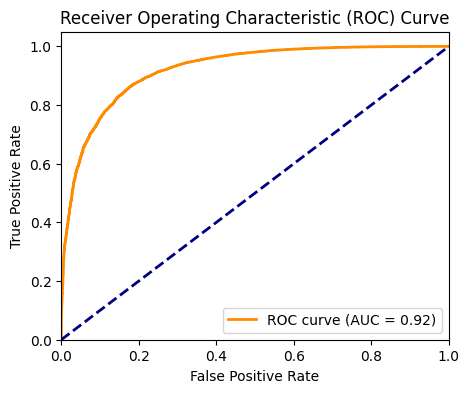

In [3]:
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM
from keras.optimizers import Adam
from keras.utils import set_random_seed
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

set_random_seed(76)

# Load your data
X = wv.drop(['overall','reviewText', 'preprocessed_text', 'embeddings'], axis = 1)
y = wv['overall']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

cw = class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(y_train), y = y_train)
class_weights = {np.unique(y_train)[0]: cw[0], np.unique(y_train)[1]: cw[1]} 

model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))  # Adjust input_shape based on your data
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate = 0.009), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
#9
model.fit(X_train, y_train, epochs=9, batch_size=128, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Test")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

y_pred_proba = model.predict(X_test)

accuracy, precision, recall, f1 = calc_metrics(y_test, y_pred)

roc_auc = get_roc_auc(y_test, y_pred_proba)

scores_data.append(['RNN', 'CBOW']+[accuracy, precision, recall, f1, roc_auc])


### Skipgram

Epoch 1/9


2024-03-18 22:13:03.732964: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


1464/1464 [==============================] - 39s 26ms/step - loss: 0.3729 - accuracy: 0.8672 - val_loss: 0.3580 - val_accuracy: 0.8671
Epoch 2/9
1464/1464 [==============================] - 39s 26ms/step - loss: 0.2937 - accuracy: 0.8838 - val_loss: 0.2592 - val_accuracy: 0.8981
Epoch 3/9
1464/1464 [==============================] - 37s 25ms/step - loss: 0.2572 - accuracy: 0.8988 - val_loss: 0.2480 - val_accuracy: 0.9000
Epoch 4/9
1464/1464 [==============================] - 37s 25ms/step - loss: 0.2344 - accuracy: 0.9088 - val_loss: 0.2320 - val_accuracy: 0.9106
Epoch 5/9
1464/1464 [==============================] - 38s 26ms/step - loss: 0.2253 - accuracy: 0.9128 - val_loss: 0.2217 - val_accuracy: 0.9142
Epoch 6/9
1464/1464 [==============================] - 37s 25ms/step - loss: 0.2199 - accuracy: 0.9154 - val_loss: 0.2212 - val_accuracy: 0.9174
Epoch 7/9
1464/1464 [==============================] - 37s 25ms/step - loss: 0.2168 - accuracy: 0.9168 - val_loss: 0.2123 - val_accuracy: 0.

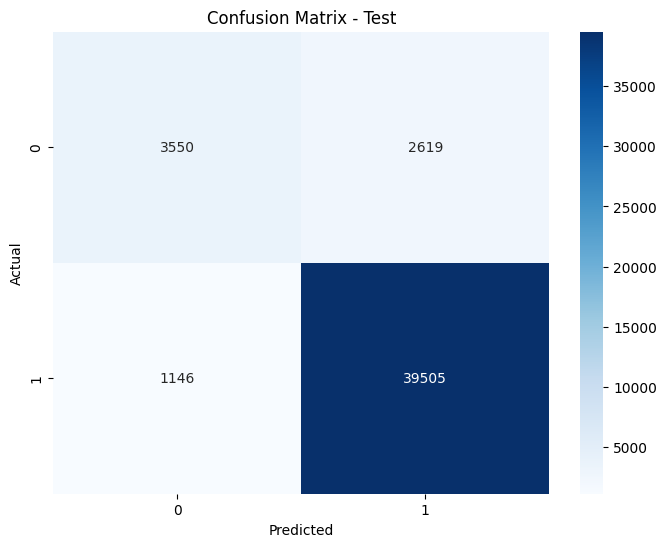

1464/1464 [==============================] - 15s 10ms/step


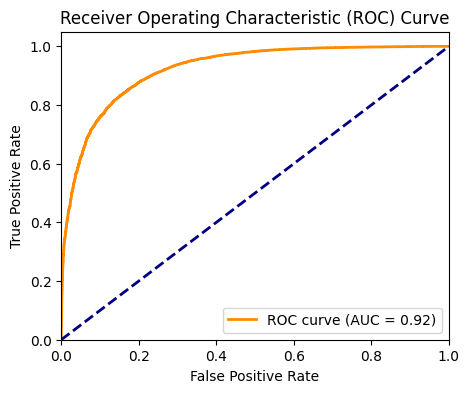

In [4]:
set_random_seed(42)

# Load your data
X = sg.drop(['overall','reviewText', 'preprocessed_text', 'embeddings'], axis = 1)
y = sg['overall']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)


model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))  # Adjust input_shape based on your data
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron for binary classification

# Compile the model
model.compile(optimizer=Adam(lr = 0.6), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
#9
model.fit(X_train, y_train, epochs=9, batch_size=128, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Test")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

y_pred_proba = model.predict(X_test)

accuracy, precision, recall, f1 = calc_metrics(y_test, y_pred)
roc_auc = get_roc_auc(y_test, y_pred_proba)

scores_data.append(['RNN', 'Skipgram']+[accuracy, precision, recall, f1, roc_auc])



### Fasttext

Epoch 1/45


2024-03-18 22:19:12.934063: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


1464/1464 [==============================] - 38s 26ms/step - loss: 0.3903 - accuracy: 0.8682 - val_loss: 0.3758 - val_accuracy: 0.8682
Epoch 2/45
1464/1464 [==============================] - 37s 25ms/step - loss: 0.3467 - accuracy: 0.8682 - val_loss: 0.3473 - val_accuracy: 0.8682
Epoch 3/45
1464/1464 [==============================] - 38s 26ms/step - loss: 0.3153 - accuracy: 0.8744 - val_loss: 0.3812 - val_accuracy: 0.8208
Epoch 4/45
1464/1464 [==============================] - 38s 26ms/step - loss: 0.2791 - accuracy: 0.8907 - val_loss: 0.2641 - val_accuracy: 0.8944
Epoch 5/45
1464/1464 [==============================] - 37s 26ms/step - loss: 0.2531 - accuracy: 0.9019 - val_loss: 0.2450 - val_accuracy: 0.9049
Epoch 6/45
1464/1464 [==============================] - 37s 25ms/step - loss: 0.2389 - accuracy: 0.9079 - val_loss: 0.2508 - val_accuracy: 0.9123
Epoch 7/45
1464/1464 [==============================] - 38s 26ms/step - loss: 0.2354 - accuracy: 0.9093 - val_loss: 0.2368 - val_accura

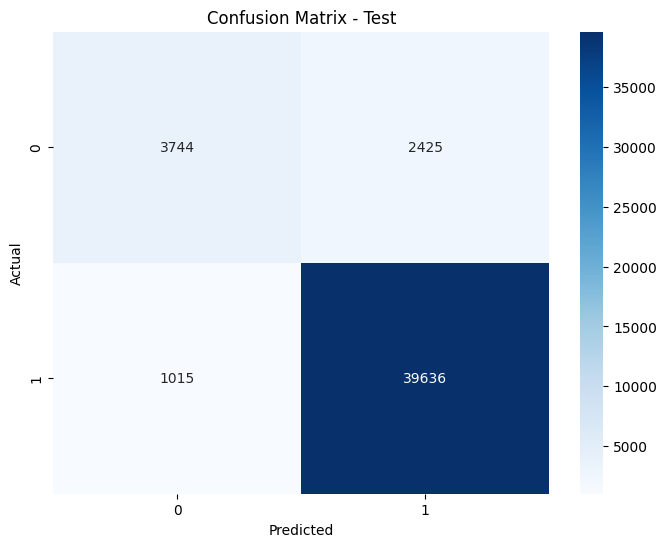

1464/1464 [==============================] - 15s 10ms/step


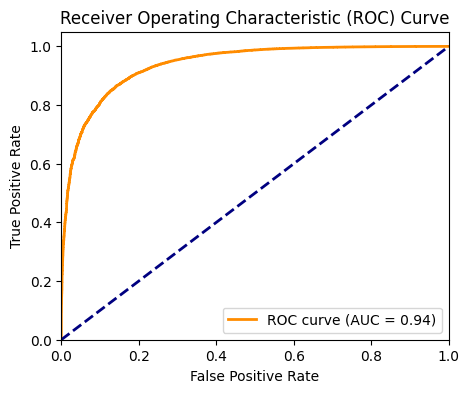

In [5]:
set_random_seed(42)

# Load your data
X = ft.drop(['overall','reviewText', 'preprocessed_text', 'embeddings'], axis = 1)
y = ft['overall']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)



model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], 1)))  # Adjust input_shape based on your data
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron for binary classification

# Compile the model
model.compile(optimizer=Adam(lr = 0.7), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
#13
model.fit(X_train, y_train, epochs=45, batch_size=128, validation_data=(X_test, y_test))

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Test")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

y_pred_proba = model.predict(X_test)

accuracy, precision, recall, f1 = calc_metrics(y_test, y_pred)
roc_auc = get_roc_auc(y_test, y_pred_proba)


scores_data.append(['RNN', 'Fasttext']+[accuracy, precision, recall, f1, roc_auc])

In [6]:
scores = pd.DataFrame(data = scores_data, columns = ['model', 'embedding','accuracy','precision','recall','f1 score','roc auc'])
scores

,model,embedding,accuracy,precision,recall,f1 score,roc auc
0,RNN,CBOW,0.917685,0.932164,0.976237,0.953691,0.920733
1,RNN,Skipgram,0.919586,0.937826,0.971809,0.954515,0.922010
2,RNN,Fasttext,0.926527,0.942346,0.975031,0.958410,0.937985


In [7]:
scores.to_csv('data/RNN_performance.csv', index = False)